In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
assert 'zipfile' in sys.modules
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as ss
from collections import Counter

In [ ]:
df = pd.read_csv('Audience_LA_DMA.csv')

In [ ]:
d = pd.read_csv('LA DMA Audience 100MB.csv')
dc = d.corr()
dc

,ZIP,AGE
ZIP,1.000000,0.005017
AGE,0.005017,1.000000


In [ ]:
df.head(50)

,Unnamed: 0,ZIP,GENDER,AGE,DEMO_HH_INCOME,ETHNICITY,HOMEOWNERSHIP_STATUS
0,0,90290,F,35.0,"$75,000 to $99,999",White,Homeowner
1,1,90036,F,37.0,"$100,000 to $149,999",White,Homeowner
2,2,92376,M,51.0,"$30,000 to $49,999",White,Homeowner
3,3,91767,F,81.0,"Less than $30,000",Asian,Homeowner
4,4,92345,F,29.0,"$30,000 to $49,999",White,Renter
5,5,92225,M,63.0,"$50,000 to $74,999",Hispanic,Homeowner
6,6,90032,F,69.0,"$75,000 to $99,999",Hispanic,Renter
7,7,90301,M,69.0,"Less than $30,000",White,Renter
8,8,90814,M,57.0,"$50,000 to $74,999",White,Homeowner
9,9,90810,F,99.0,"$30,000 to $49,999",Hispanic,Homeowner


In [ ]:
df.isna().sum()

Unnamed: 0                   0
ZIP                          0
GENDER                  120129
AGE                         39
DEMO_HH_INCOME               0
ETHNICITY                    0
HOMEOWNERSHIP_STATUS         0
dtype: int64

# Dropping Null Values

In [ ]:
# make gender M:0, F:1, NAN=3, and group 3 
#Lubah task
df.pivot_table(index='GENDER', columns='ETHNICITY', values="Unnamed: 0",aggfunc= 'count' )

ETHNICITY,African American,Asian,Hispanic,White
GENDER,,,,
F,263592,662463,2241155,2927319
M,228621,672326,2013649,2816115


In [ ]:
df2= df.dropna()

In [ ]:
df2.shape


(11825205, 7)

In [ ]:
df.shape

(11945369, 7)

In [ ]:
df2 = df2.rename(columns = {'ETHNICITY': 'RACE', 'Unnamed: 0':'ID'})


In [ ]:
df2

,ID,ZIP,GENDER,AGE,DEMO_HH_INCOME,RACE,HOMEOWNERSHIP_STATUS
0,0,90290,F,35.0,"$75,000 to $99,999",White,Homeowner
1,1,90036,F,37.0,"$100,000 to $149,999",White,Homeowner
2,2,92376,M,51.0,"$30,000 to $49,999",White,Homeowner
3,3,91767,F,81.0,"Less than $30,000",Asian,Homeowner
4,4,92345,F,29.0,"$30,000 to $49,999",White,Renter
...,...,...,...,...,...,...,...
11945364,11945364,91354,F,53.0,"$100,000 to $149,999",Hispanic,Renter
11945365,11945365,90262,M,45.0,"Less than $30,000",Hispanic,Homeowner
11945366,11945366,91326,F,27.0,"$30,000 to $49,999",Asian,Homeowner
11945367,11945367,92672,M,73.0,"$100,000 to $149,999",White,Homeowner


In [ ]:
pd.get_dummies(df2, columns=['DEMO_HH_INCOME'])

,ID,ZIP,GENDER,AGE,RACE,HOMEOWNERSHIP_STATUS,"DEMO_HH_INCOME_$100,000 to $149,999","DEMO_HH_INCOME_$150,000 to $199,999","DEMO_HH_INCOME_$200,000 to $249,999","DEMO_HH_INCOME_$250,000 +","DEMO_HH_INCOME_$30,000 to $49,999","DEMO_HH_INCOME_$50,000 to $74,999","DEMO_HH_INCOME_$75,000 to $99,999","DEMO_HH_INCOME_Less than $30,000"
0,0,90290,F,35.0,White,Homeowner,0,0,0,0,0,0,1,0
1,1,90036,F,37.0,White,Homeowner,1,0,0,0,0,0,0,0
2,2,92376,M,51.0,White,Homeowner,0,0,0,0,1,0,0,0
3,3,91767,F,81.0,Asian,Homeowner,0,0,0,0,0,0,0,1
4,4,92345,F,29.0,White,Renter,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11945364,11945364,91354,F,53.0,Hispanic,Renter,1,0,0,0,0,0,0,0
11945365,11945365,90262,M,45.0,Hispanic,Homeowner,0,0,0,0,0,0,0,1
11945366,11945366,91326,F,27.0,Asian,Homeowner,0,0,0,0,1,0,0,0
11945367,11945367,92672,M,73.0,White,Homeowner,1,0,0,0,0,0,0,0


In [ ]:
df3 = df.groupby(by='DEMO_HH_INCOME').agg('count')

In [ ]:
df3 = df3.drop(columns = ['ZIP','GENDER','AGE','ETHNICITY','HOMEOWNERSHIP_STATUS'])

In [ ]:
#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(df2[['ID', 'DEMO_HH_INCOME']])
df3 = df3.rename(columns = {'Unnamed: 0':'Count'})
df3

,Count
DEMO_HH_INCOME,
"$100,000 to $149,999",1921986
"$150,000 to $199,999",301654
"$200,000 to $249,999",143142
"$250,000 +",417695
"$30,000 to $49,999",2165737
"$50,000 to $74,999",2837150
"$75,000 to $99,999",1770517
"Less than $30,000",2387488


In [ ]:
#enc.categories_
df3.index

Index(['$100,000 to $149,999', '$150,000 to $199,999', '$200,000 to $249,999',
       '$250,000 +', '$30,000 to $49,999', '$50,000 to $74,999',
       '$75,000 to $99,999', 'Less than $30,000'],
      dtype='object', name='DEMO_HH_INCOME')

In [ ]:
#y = enc.transform(df2[['ID', 'DEMO_HH_INCOME']])

<Figure size 7200x720 with 0 Axes>

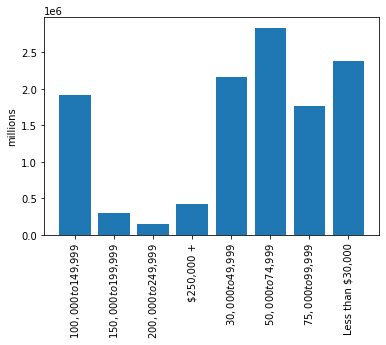

<Figure size 7200x720 with 0 Axes>

In [ ]:
plt.xticks(rotation=90)
plt.ylabel('millions')
plt.bar(df3.index,df3['Count'])
plt.figure(figsize=(100,10))


In [ ]:
#ax = sns.heatmap(df,annot=True, fmt="d")
#ax

In [ ]:
#corre = df.corr()

In [ ]:
#print(corre)
_REPLACE = 'replace'
_DEFAULT_REPLACE_VALUE = 0.0


In [ ]:
#f, ax = plt.subplots(figsize=(11, 9))
def replace_nan_with_value(x, y, value):
    x = np.array([v if v == v and v is not None else value for v in x])  # NaN != NaN
    y = np.array([v if v == v and v is not None else value for v in y])
    return x, y

In [ ]:
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))
#d
def remove_incomplete_samples(x, y):
    x = [v if v is not None else np.nan for v in x]
    y = [v if v is not None else np.nan for v in y]
    arr = np.array([x, y]).transpose()
    arr = arr[~np.isnan(arr).any(axis=1)].transpose()
    if isinstance(x, list):
        return arr[0].tolist(), arr[1].tolist()
    else:
        return arr[0], arr[1]


In [ ]:
def conditional_entropy(x,y,
                        nan_strategy=_REPLACE,
                        nan_replace_value=_DEFAULT_REPLACE_VALUE,
                        log_base: float = math.e):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    log_base: float, default = e
        specifying base for calculating entropy. Default is base e.
    Returns:
    --------
    float
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy

In [ ]:
def theils_u(x,
             y,
             nan_strategy=_REPLACE,
             nan_replace_value=_DEFAULT_REPLACE_VALUE):
    """
    Calculates Theil's U statistic (Uncertainty coefficient) for categorical-
    categorical association. This is the uncertainty of x given y: value is
    on the range of [0,1] - where 0 means y provides no information about
    x, and 1 means y provides full information about x.
    This is an asymmetric coefficient: U(x,y) != U(y,x)
    Wikipedia: https://en.wikipedia.org/wiki/Uncertainty_coefficient
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    Returns:
    --------
    float in the range of [0,1]
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [ ]:
theils_u(df2['RACE'],df2['HOMEOWNERSHIP_STATUS'])

0.008706135572877152

In [ ]:
conditional_entropy(df2['RACE'],df2['HOMEOWNERSHIP_STATUS'])

1.0875579552838965

In [ ]:
def cramers_v(x,
              y,
              bias_correction=True,
              nan_strategy=_REPLACE,
              nan_replace_value=_DEFAULT_REPLACE_VALUE):
    """
    Calculates Cramer's V statistic for categorical-categorical association.
    This is a symmetric coefficient: V(x,y) = V(y,x)
    Original function taken from: https://stackoverflow.com/a/46498792/5863503
    Wikipedia: https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V
    Parameters:
    -----------
    x : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    y : list / NumPy ndarray / Pandas Series
        A sequence of categorical measurements
    bias_correction : Boolean, default = True
        Use bias correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328.
    nan_strategy : string, default = 'replace'
        How to handle missing values: can be either 'drop' to remove samples
        with missing values, or 'replace' to replace all missing values with
        the nan_replace_value. Missing values are None and np.nan.
    nan_replace_value : any, default = 0.0
        The value used to replace missing values with. Only applicable when
        nan_strategy is set to 'replace'.
    Returns:
    --------
    float in the range of [0,1]
    """
    if nan_strategy == _REPLACE:
        x, y = replace_nan_with_value(x, y, nan_replace_value)
    elif nan_strategy == _DROP:
        x, y = remove_incomplete_samples(x, y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    if bias_correction:
        phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
        rcorr = r - ((r - 1) ** 2) / (n - 1)
        kcorr = k - ((k - 1) ** 2) / (n - 1)
        if min((kcorr - 1), (rcorr - 1)) == 0:
            warnings.warn(
                "Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False",
                RuntimeWarning)
            return np.nan
        else:
            return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    else:
        return np.sqrt(phi2 / min(k - 1, r - 1))


In [ ]:
df2['ZIP'] = df2['ZIP'].astype(str)

In [ ]:
a = df2.columns.astype(list)
for ab in a:
    print(ab)

In [ ]:
dictionary = dict()
for x in df2.columns.astype(list):
    for y in df2.columns.astype(list):
        dictionary[x + '_' + y] = conditional_entropy(df2[x],df2[y])
        print(dictionary[x + '_' + y])
        
        

In [ ]:
dictionary